In [1]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [2]:
df = pd.read_csv(r"C:\Users\kurbi\Desktop\Data Science\electricity_cost_dataset.csv")
df.head()

,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
0,1360,Mixed-use,2519.0,69,52,188,1,72,1420.0
1,4272,Mixed-use,2324.0,50,76,165,65,261,3298.0
2,3592,Mixed-use,2701.0,20,94,198,39,117,3115.0
3,966,Residential,1000.0,13,60,74,3,35,1575.0
4,4926,Residential,5990.0,23,65,32,57,185,4301.0


In [3]:
df.describe()

,site area,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2757.775100,3494.057100,49.598000,64.842200,99.468600,36.402600,85.573100,2837.845000
std,1293.059959,2076.181117,23.430141,20.432965,58.014526,20.623905,107.876179,1106.997441
min,501.000000,1000.000000,10.000000,30.000000,0.000000,1.000000,0.000000,500.000000
25%,1624.000000,1779.000000,29.750000,47.000000,49.000000,19.000000,0.000000,1954.000000
50%,2773.500000,3047.500000,49.000000,65.000000,100.000000,36.000000,39.000000,2760.000000
75%,3874.000000,4811.000000,70.000000,83.000000,150.000000,54.000000,142.000000,3632.000000
max,5000.000000,10894.000000,90.000000,100.000000,200.000000,72.000000,489.000000,6446.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   site area             10000 non-null  int64  
 1   structure type        10000 non-null  object 
 2   water consumption     10000 non-null  float64
 3   recycling rate        10000 non-null  int64  
 4   utilisation rate      10000 non-null  int64  
 5   air qality index      10000 non-null  int64  
 6   issue reolution time  10000 non-null  int64  
 7   resident count        10000 non-null  int64  
 8   electricity cost      10000 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 703.3+ KB


In [5]:
df.shape

(10000, 9)

In [6]:
df.isna().sum()

site area               0
structure type          0
water consumption       0
recycling rate          0
utilisation rate        0
air qality index        0
issue reolution time    0
resident count          0
electricity cost        0
dtype: int64

In [7]:
X = df[['site area','water consumption','recycling rate','utilisation rate','air qality index', 'issue reolution time', 'resident count']]
y = df['electricity cost']

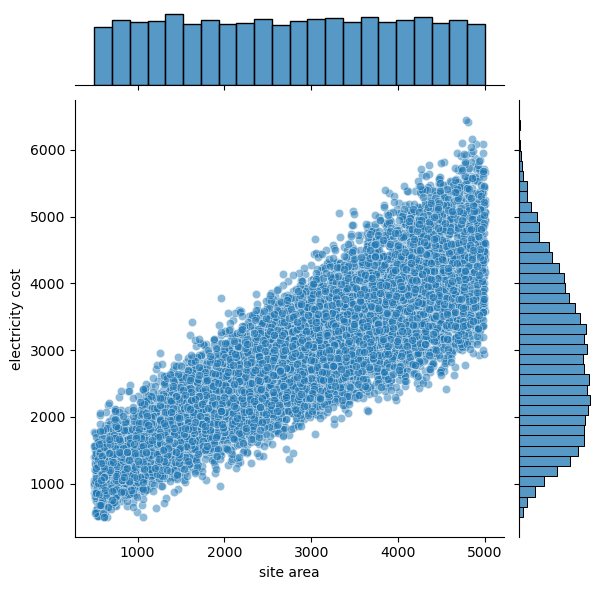

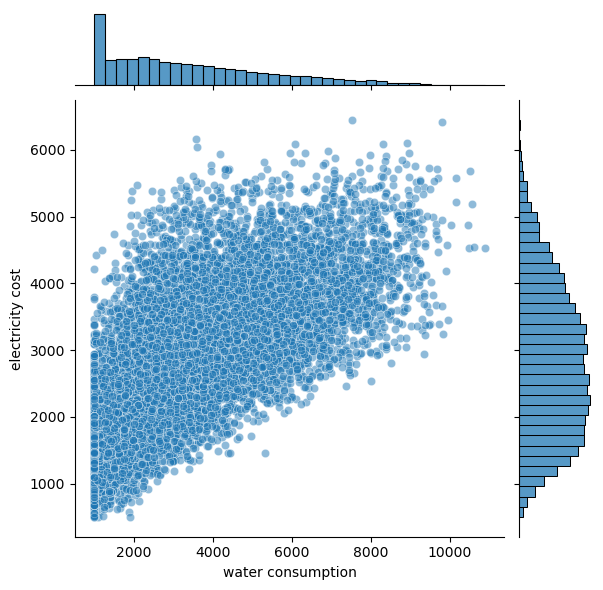

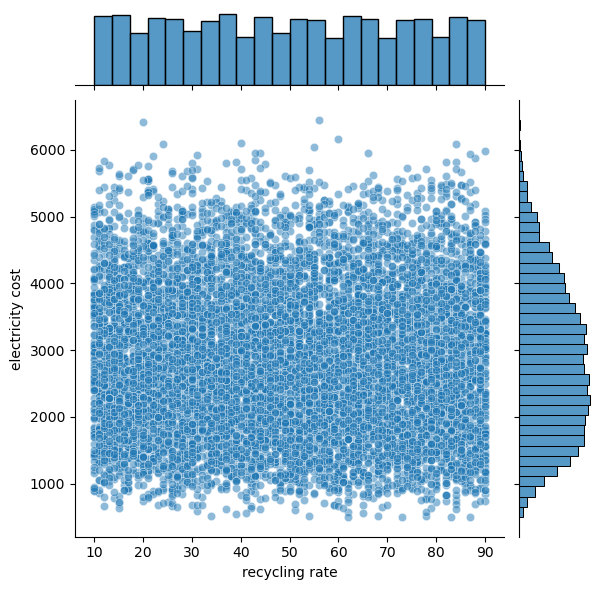

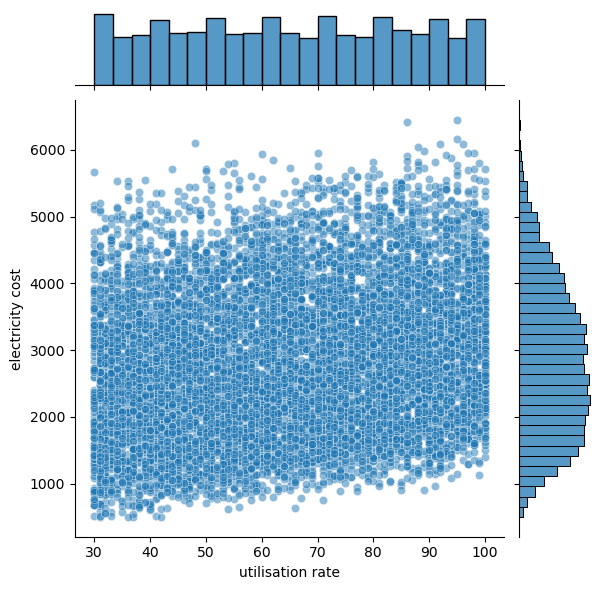

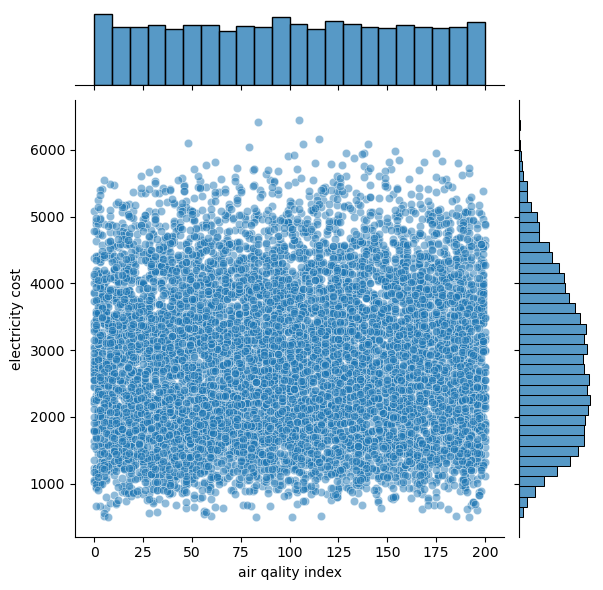

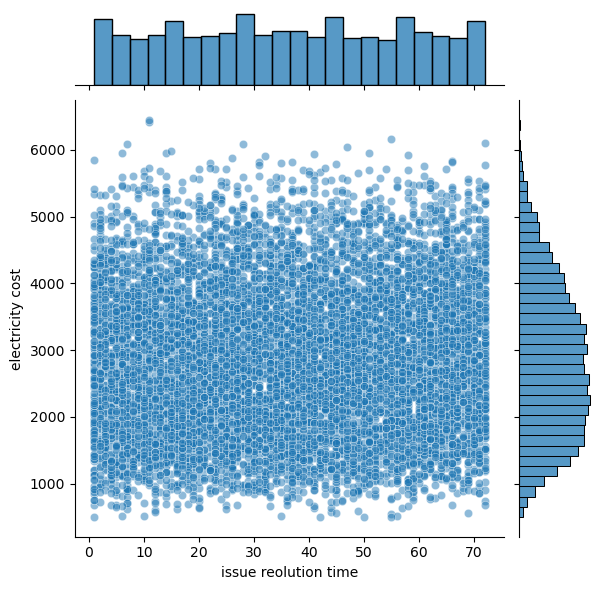

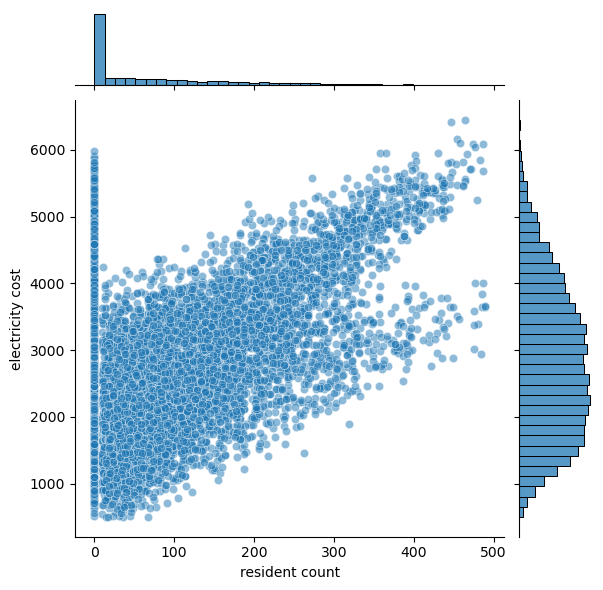

In [8]:
sns.jointplot(x='site area', y='electricity cost', data=df, alpha=0.5)
sns.jointplot(x='water consumption', y='electricity cost', data=df, alpha=0.5)
sns.jointplot(x='recycling rate', y='electricity cost', data=df, alpha=0.5)
sns.jointplot(x='utilisation rate', y='electricity cost', data=df, alpha=0.5)
sns.jointplot(x='air qality index', y='electricity cost', data=df, alpha=0.5)
sns.jointplot(x='issue reolution time', y='electricity cost', data=df, alpha=0.5)
sns.jointplot(x='resident count', y='electricity cost', data=df, alpha=0.5)


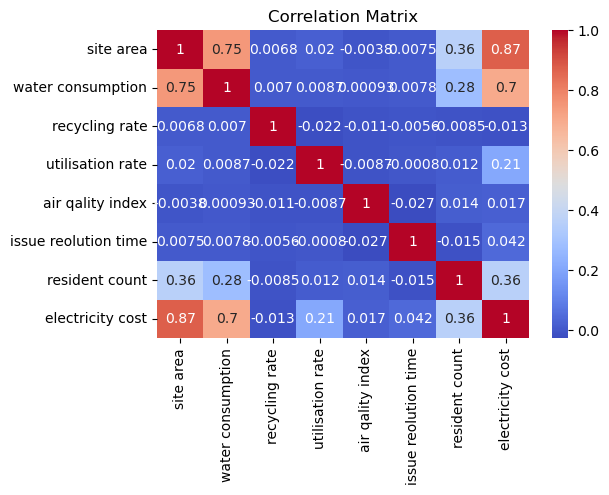

In [9]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(6, 4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test_scaled)
R2 = r2_score(y_test, y_pred)

MAE = mean_absolute_error(y_test, y_pred)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared: {R2:.4f}")
print(f"MAE: {MAE:.4f}")

print(f"RMSE: {RMSE:.4f}")

R-squared: 0.8111
MAE: 377.3017
RMSE: 485.3902


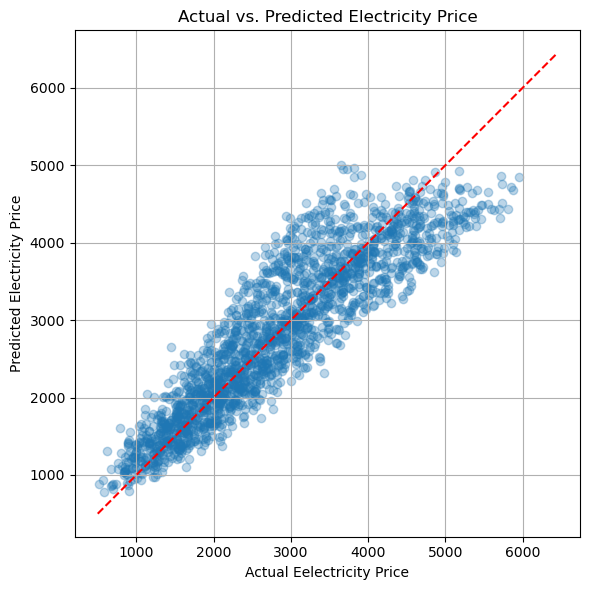

In [14]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Eelectricity Price")
plt.ylabel("Predicted Electricity Price")
plt.title("Actual vs. Predicted Electricity Price")
plt.grid(True)
plt.tight_layout()
plt.show()